## Dataset  Details

1. Title : Diamonds Dataset

2. the 7th column "price" is the values to be predicted.

3. Data Type : Mixed ( Numerical + Categorical)
	
4. Dataset has nearly 54000 instances.

5. It has 10 features.

6. Features 

	price : price in US dollars (\$326--\$18,823)

	carat : weight of the diamond (0.2--5.01)

	cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

	color : diamond colour, from J (worst) to D (best)

	clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

	x : length in mm (0--10.74)

	y : width in mm (0--58.9)

	z : depth in mm (0--31.8)

	depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

	table : width of top of diamond relative to widest point (43--95)

7. Caution : Handle Categorical data before building a model. 


## Importing Necessary Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid", color_codes=True)
pd.set_option('display.max_columns', None)

### loading dataset

In [2]:
data = pd.read_csv("diamonds.csv")

In [3]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
data.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


**Description for Numerical values**

In [7]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Description for Categorial values**

In [8]:
data.describe(include=['object'])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [9]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
data.isin([-1, 'NaN']).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In this dataset,we didnot found any null values

Data Divided Into Two Types
1. Categorical
2. numerical

In [11]:
# numerical data
num_data = data.select_dtypes(exclude=['object'])


In [12]:
#categorical data
cat_data = data.select_dtypes(include=['object'])


#### numerical data

In [13]:
num_data.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


#### Categorical data

In [14]:
cat_data.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


## Univariant Analysis

### PDF

In [15]:
def pdf_data(column):
  mini = num_data[column].min()
  maxi = num_data[column].max()
  ran = num_data[column].max()-num_data[column].min()
  mean = num_data[column].mean()
  median = num_data[column].median()
  st_dev = num_data[column].std()
  skew = num_data[column].skew()
  kurtosis = num_data[column].kurt()

  # calculating points of standard deviation
  points = mean-st_dev, mean+st_dev
    
  plt.figure(figsize=(15,6))

  sns.distplot(num_data[column],hist=True, kde=True)

  sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
  sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
  plt.axvline(mean,color='red',label='mean')
  sns.scatterplot([median], [0], color = 'blue', label = "median")
  plt.xlabel('{}'.format(column), fontsize = 20)
  plt.ylabel('density')
  plt.title('std_dev = {}; \nskew = {}; \nkurtosis = {}; \nrange = {}; \nmean = {}; \nmedian = {}'.format((round(points[0],2),round(points[1],2)),

                                                                                                  round(skew,2),
                                                                                                  round(kurtosis,2),
                                                                                                  (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                  round(mean,2),
                                                                                                  round(median,2)))

**pdf of carat**

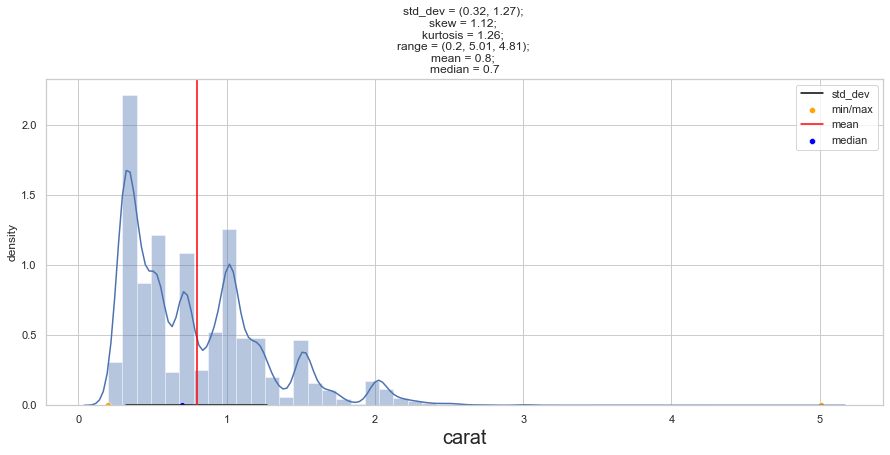

In [16]:
pdf_data('carat')

**pdf of Depth**

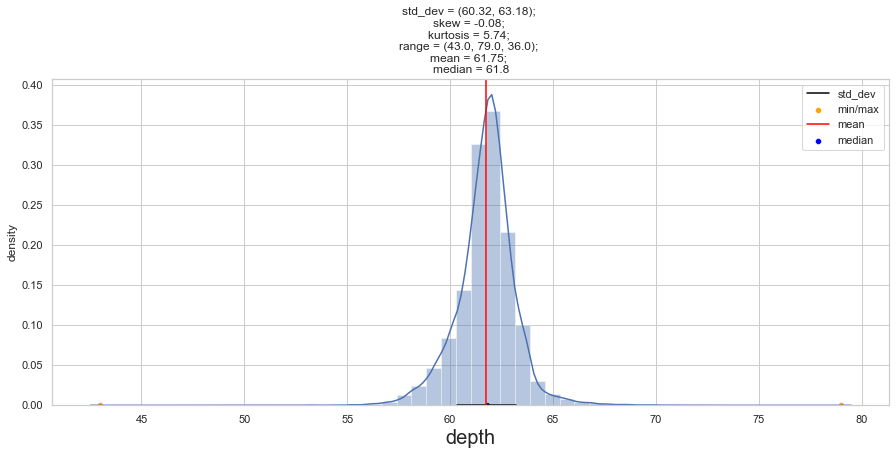

In [17]:
pdf_data('depth')

**pdf of Table**

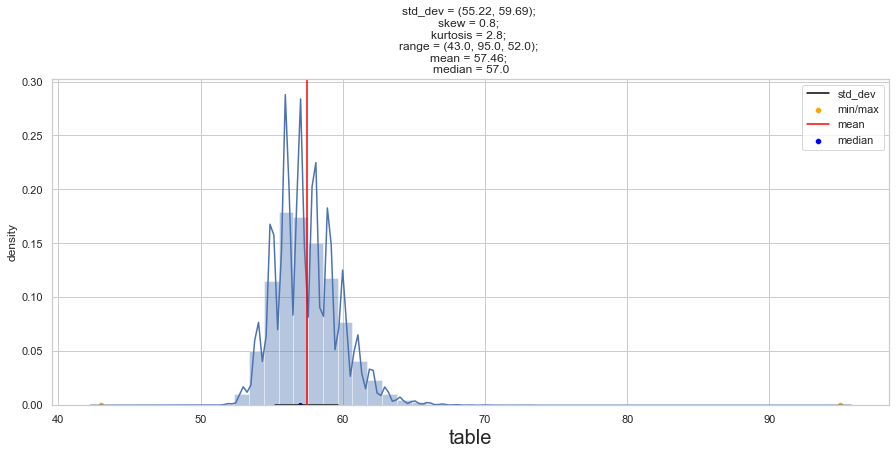

In [18]:
pdf_data('table')

**pdf of Price**

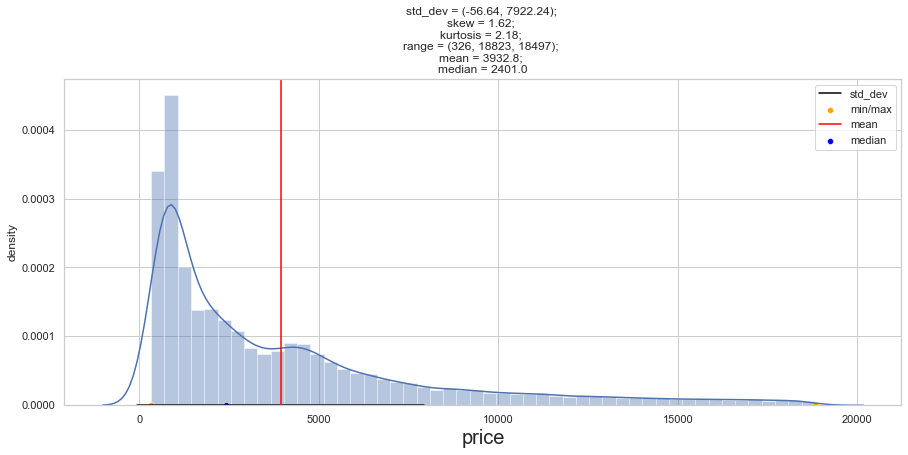

In [19]:
pdf_data('price')

**pdf of X**

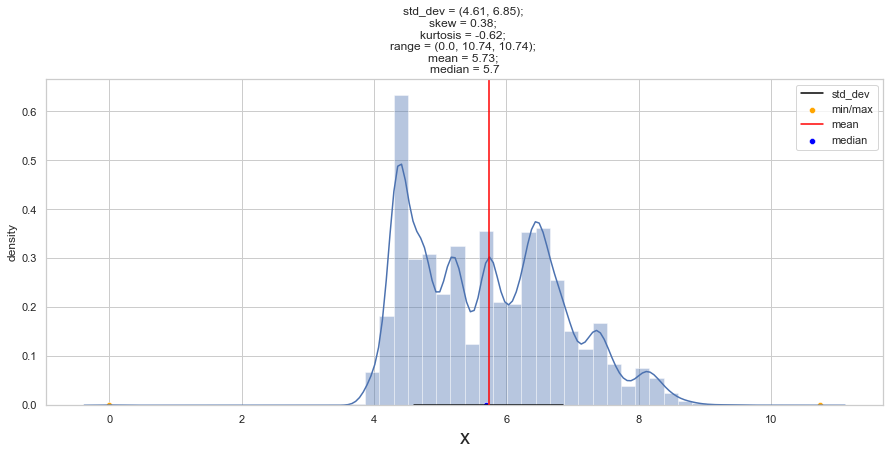

In [20]:
pdf_data('x')

**pdf of Y**

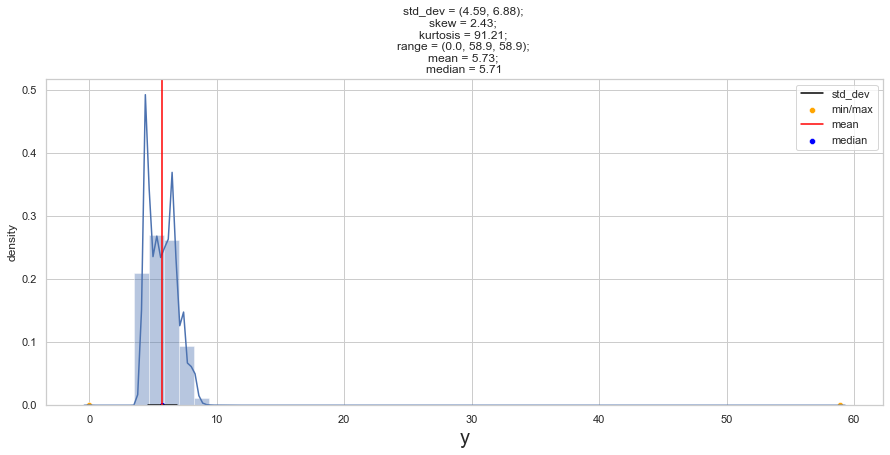

In [21]:
pdf_data('y')

**pdf of Z**

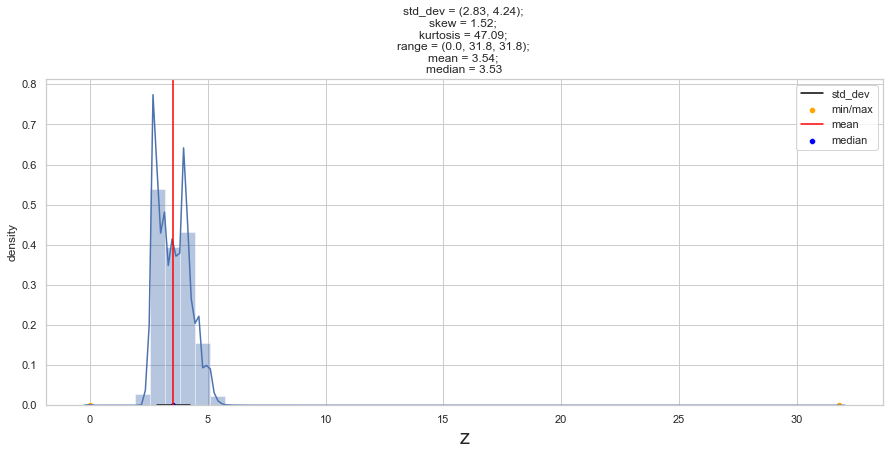

In [22]:
pdf_data('z')

#### Above data tells Outliers in the data

### Outliers in Numerical column

In [23]:
outliers = pd.DataFrame(columns=['col_names','Outliers','Percentage']) 
    
for column in list(num_data):  
    # first quartile
    q1 = num_data[column].quantile(0.25)
    # third quartile
    q3 = num_data[column].quantile(0.75) 
    # Inter Quantile Range
    iqr = q3 - q1 
        
    lower_value = q1 - (1.5*iqr)        
    upper_value = q3 + (1.5*iqr)
        
    total_outlier = num_data[(num_data[column] < lower_value) | (num_data[column] > upper_value)].shape[0]    
    percent = (total_outlier / len(num_data[column])) * 100
    outliers = outliers.append({'col_names':column,'Outliers':total_outlier,'Percentage':percent},ignore_index=True)
        
outliers

,col_names,Outliers,Percentage
0,carat,1889,3.502039
1,depth,2545,4.718205
2,table,605,1.121617
3,price,3540,6.562848
4,x,32,0.059325
5,y,29,0.053763
6,z,49,0.090842


### removing outliers for num_data

In [24]:
# removing outliers
def drop_outliers(num_data, field_name):
    iqr = 1.5 * (np.percentile(num_data[field_name], 75) - np.percentile(num_data[field_name], 25))
    num_data.drop(num_data[num_data[field_name] > (iqr + np.percentile(num_data[field_name], 75))].index, inplace=True)
    num_data.drop(num_data[num_data[field_name] < (np.percentile(num_data[field_name], 25) - iqr)].index, inplace=True)

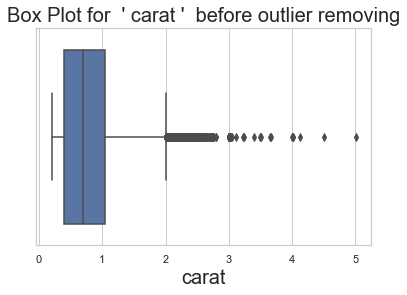

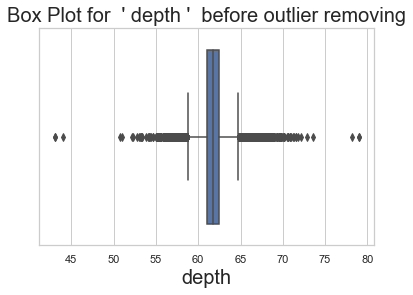

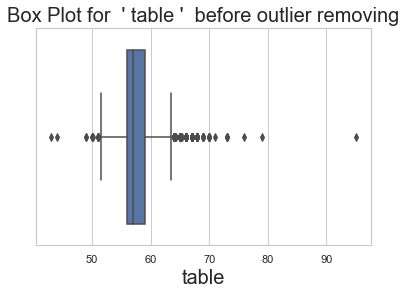

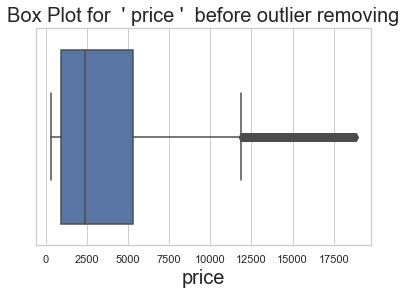

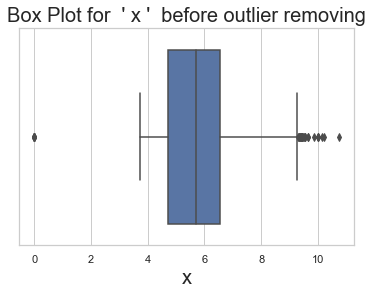

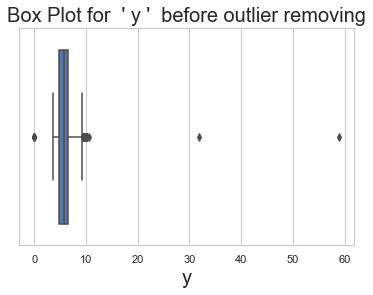

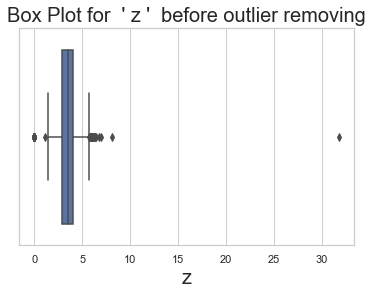

In [25]:
for col in num_data.columns:
    sns.boxplot(num_data[col].dropna())
    plt.title("Box Plot for " + " ' " + col + " ' " + " before outlier removing",fontsize = 20)
    plt.xlabel(col,fontsize = 20)
    plt.show()


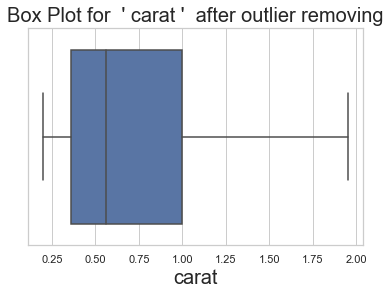

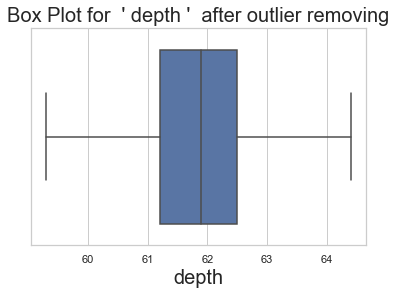

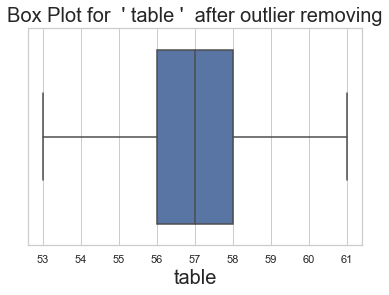

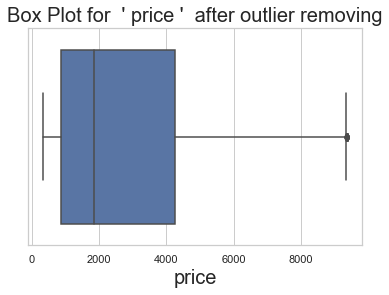

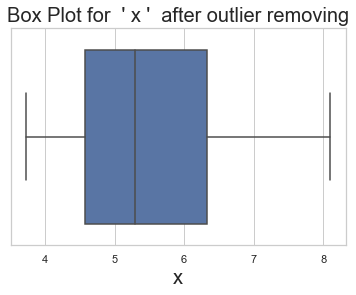

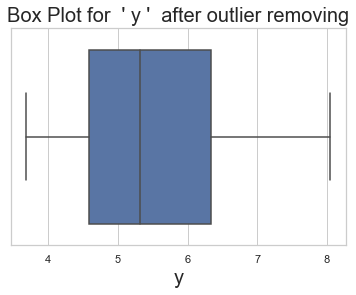

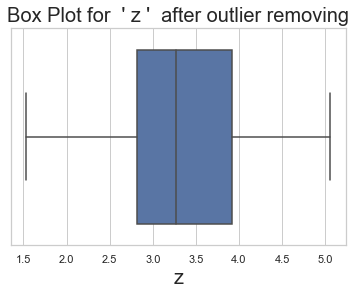

In [31]:
for col in num_data.columns:
    drop_outliers(num_data,col)
    sns.boxplot(num_data[col].dropna())
    plt.title("Box Plot for " + " ' " + col + " ' " + " after outlier removing",fontsize = 20)
    plt.xlabel(col,fontsize = 20)
    plt.show()

## Data Visualization

### Countplot for Categorical colsumns

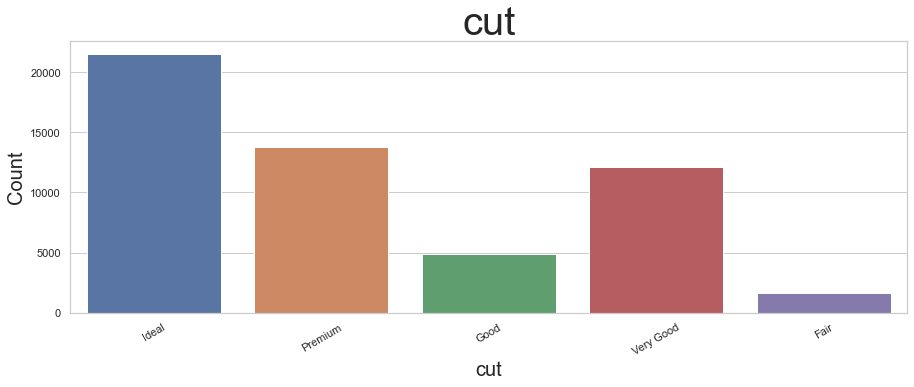

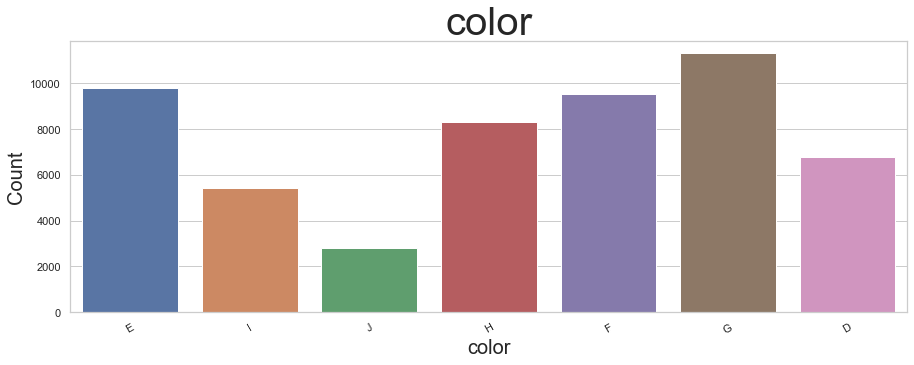

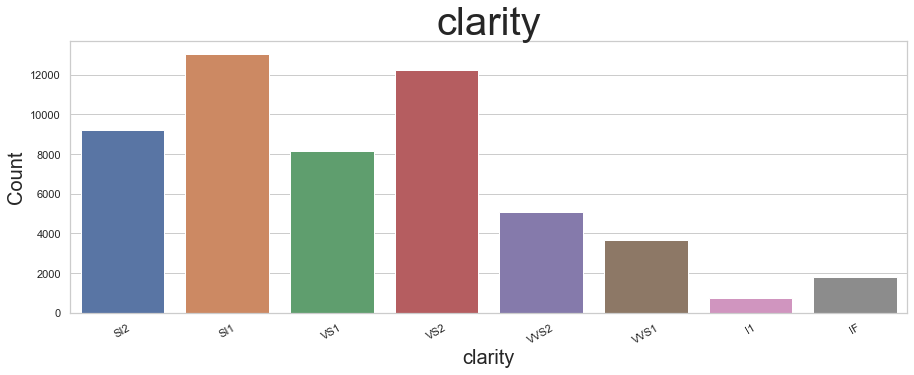

In [32]:
for col in cat_data.columns:
    plt.figure(figsize=(15,5))
    plt.xticks(rotation = 30)
    p=sns.countplot(cat_data[col].dropna())
    p.set_xlabel(col, fontsize = 20)
    p.set_ylabel("Count", fontsize = 20)
    p.set_title(col, fontsize = 40)

### Pair Plot

<Figure size 1440x1080 with 0 Axes>

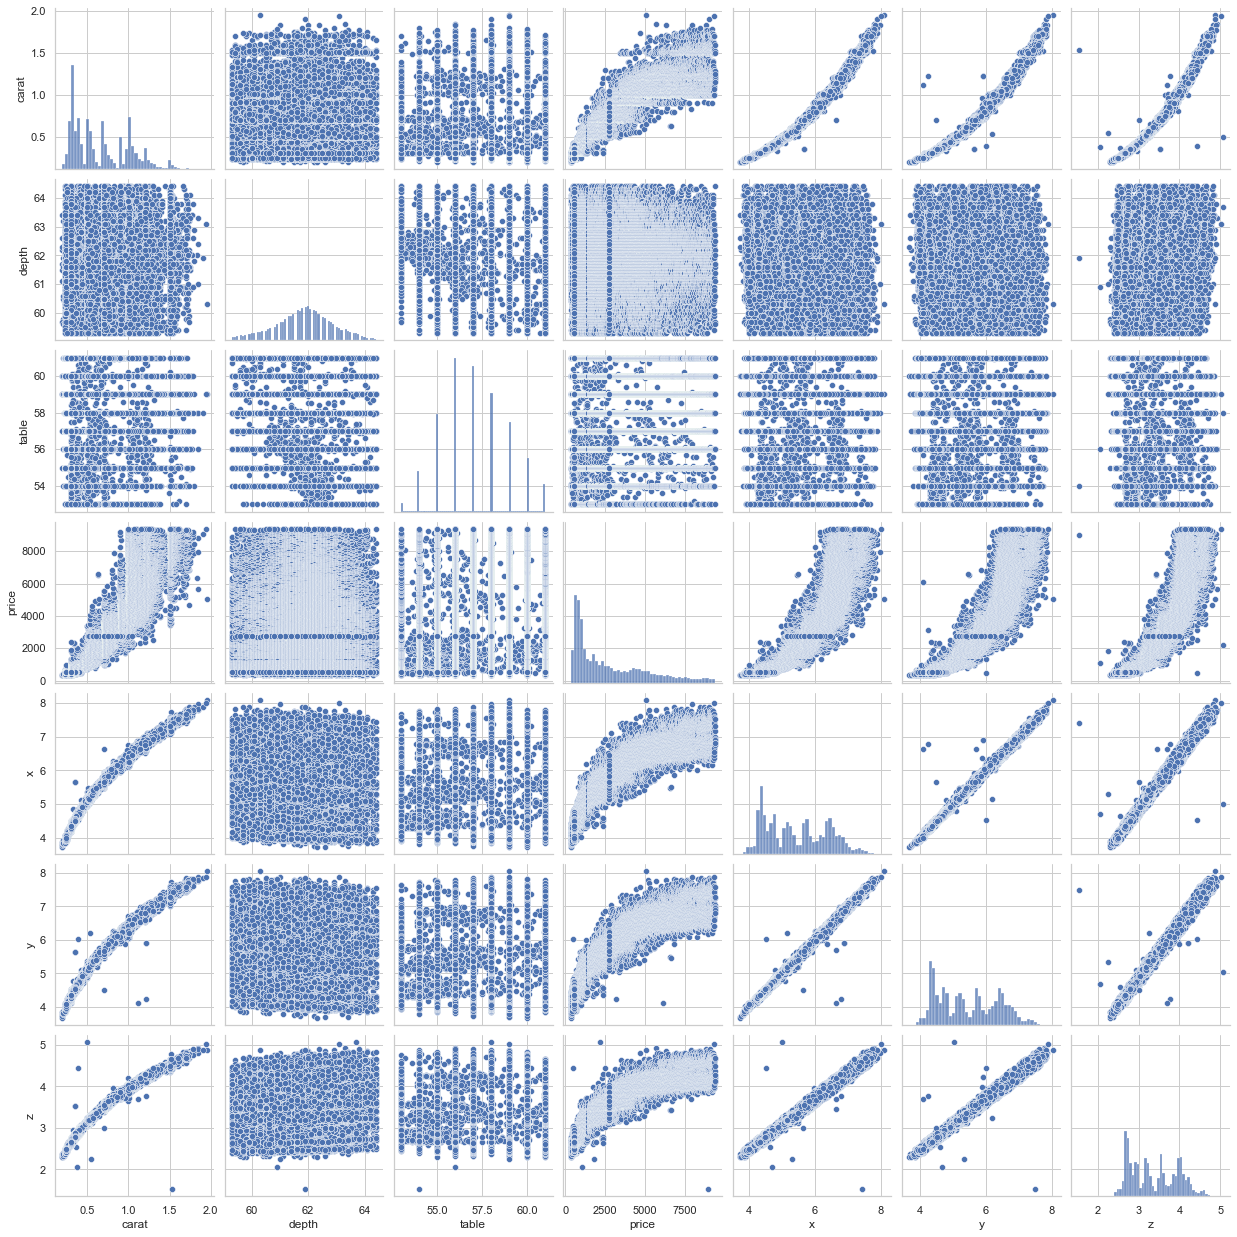

In [33]:
plt.figure(figsize=(20,15))
sns.pairplot(num_data)
plt.show()

In [34]:
data1 = pd.concat([num_data,cat_data],axis = 1)

In [35]:
data1.head()

,carat,depth,table,price,x,y,z,cut,color,clarity
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43,Ideal,E,SI2
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31,Premium,E,SI1
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63,Premium,I,VS2
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75,Good,J,SI2
5,0.24,62.8,57.0,336.0,3.94,3.96,2.48,Very Good,J,VVS2


### Price vs cut

<AxesSubplot:xlabel='cut', ylabel='price'>

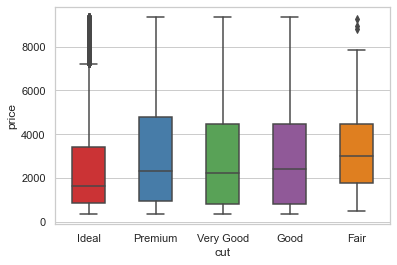

In [36]:
sns.boxplot(y='price',data=data1,x='cut',palette ='Set1', width =0.5,order =['Ideal' ,'Premium' ,'Very Good' ,'Good' ,'Fair'] )

### Price vs color

<AxesSubplot:xlabel='color', ylabel='price'>

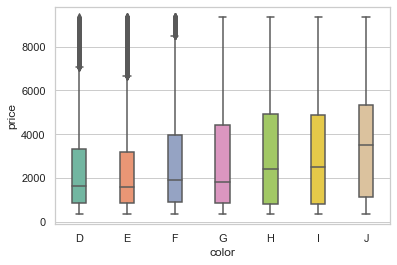

In [37]:
sns.boxplot(y='price',data=data1,x='color',palette ='Set2',width =0.3,order = ['D','E','F','G','H','I','J'] )

### Price vs clarity

<AxesSubplot:xlabel='clarity', ylabel='price'>

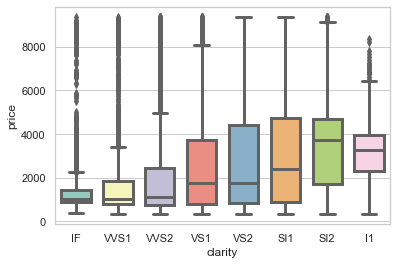

In [38]:
sns.boxplot(y='price',data=data1,x='clarity',palette ='Set3', width =0.7,linewidth=3,order =['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'])

### correlation of numerical Data

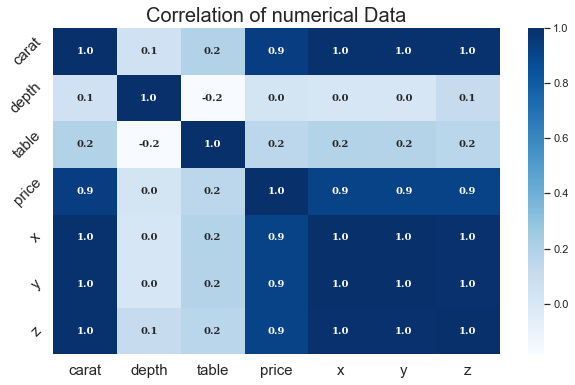

In [39]:
plt.figure(figsize = (10,6))
res = sns.heatmap(num_data.corr(), cbar=True, fmt='.1f', annot=True, cmap='Blues',annot_kws={
                'fontsize': 10,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            })
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 15)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 15, rotation=45)
plt.title("Correlation of numerical Data",fontsize = 20)
plt.savefig('Correlation Heat map')

Above plot tells Carat,x,y,z Features are Highly correlated

In [40]:
num_data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.058080,0.189312,0.931778,0.987660,0.986654,0.986863
depth,0.058080,1.000000,-0.184002,0.030662,0.012456,0.010515,0.109373
table,0.189312,-0.184002,1.000000,0.152013,0.182458,0.176783,0.161717
price,0.931778,0.030662,0.152013,1.000000,0.914737,0.915347,0.912285
x,0.987660,0.012456,0.182458,0.914737,1.000000,0.998428,0.994159
y,0.986654,0.010515,0.176783,0.915347,0.998428,1.000000,0.993937
z,0.986863,0.109373,0.161717,0.912285,0.994159,0.993937,1.000000


## Data Processing

In [41]:
df = data.copy()

In [42]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Model

**Separating the features and target**

In [43]:
X = df.drop(columns='price', axis=1)
Y = df['price']

**Feature variables**

In [44]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


**Target Variable**

In [45]:
Y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

## **Splitting the data into training data & Testing data**

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=100)

In [47]:
print(X.shape, X_train.shape, X_test.shape)

(53940, 9) (40455, 9) (13485, 9)


**Handling Categorical columns**

In [48]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,cut,color,clarity
33169,Ideal,D,VS1
53170,Premium,E,SI1
27846,Ideal,D,VS1
20880,Premium,F,VVS2
28554,Premium,H,VS1


In [49]:
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

X_train_cat['color'] = X_train_cat['color'].apply(lambda x : color_encoder[x])

**Label Encoding**

In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [51]:
X_train_cat['cut']=le.fit_transform(X_train_cat['cut'])
X_train_cat['clarity']=le.fit_transform(X_train_cat['clarity'])

In [52]:
X_train_cat.head()

,cut,color,clarity
33169,2,7,4
53170,3,6,2
27846,2,7,4
20880,3,5,7
28554,3,3,4


**Handling numerical columns**

In [53]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,carat,depth,table,x,y,z
33169,0.30,61.9,54.1,4.28,4.33,2.67
53170,0.71,59.5,62.0,5.85,5.74,3.45
27846,0.30,62.2,56.0,4.27,4.31,2.67
20880,1.02,62.9,59.0,6.42,6.37,4.02
28554,0.30,60.1,61.0,4.32,4.30,2.59


In [54]:
X_train_cn = pd.concat([X_train_cat,X_train_num], axis=1)

X_train_cn.head()

,cut,color,clarity,carat,depth,table,x,y,z
33169,2,7,4,0.30,61.9,54.1,4.28,4.33,2.67
53170,3,6,2,0.71,59.5,62.0,5.85,5.74,3.45
27846,2,7,4,0.30,62.2,56.0,4.27,4.31,2.67
20880,3,5,7,1.02,62.9,59.0,6.42,6.37,4.02
28554,3,3,4,0.30,60.1,61.0,4.32,4.30,2.59


### Standardizing The Data

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train_new = pd.DataFrame(scaler.fit_transform(X_train_cn), 
                                    columns = X_train_cn.columns, 
                                    index = X_train_cn.index)

X_train_new.head()

,cut,color,clarity,carat,depth,table,x,y,z
33169,-0.536796,1.529921,0.092035,-1.050294,0.099874,-1.495687,-1.293573,-1.220387,-1.249413
53170,0.436844,0.941277,-1.068593,-0.186302,-1.572250,2.031741,0.105090,0.003601,-0.128311
27846,-0.536796,1.529921,0.092035,-1.050294,0.308890,-0.647318,-1.302482,-1.237749,-1.249413
20880,0.436844,0.352633,1.832978,0.466960,0.796592,0.692211,0.612885,0.550489,0.690955
28554,0.436844,-0.824654,0.092035,-1.050294,-1.154219,1.585231,-1.257938,-1.246430,-1.364397


### Test Data

In [57]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,cut,color,clarity
52264,Ideal,E,VS2
21073,Ideal,G,VS1
42161,Ideal,G,SI1
35974,Ideal,F,VS1
7641,Premium,G,IF


In [58]:
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

X_test_cat['color'] = X_test_cat['color'].apply(lambda x : color_encoder[x])

Label Encoding

In [59]:
X_test_cat['cut']=le.fit_transform(X_test_cat['cut'])
X_test_cat['clarity']=le.fit_transform(X_test_cat['clarity'])

In [60]:
X_test_cat.head()

,cut,color,clarity
52264,2,6,5
21073,2,4,4
42161,2,4,2
35974,2,5,4
7641,3,4,1


**Handling numerical columns**

In [61]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,carat,depth,table,x,y,z
52264,0.57,61.5,57.0,5.35,5.32,3.28
21073,1.16,61.5,55.0,6.75,6.81,4.17
42161,0.51,63.2,58.0,5.05,5.08,3.20
35974,0.42,60.6,56.0,4.83,4.87,2.94
7641,0.80,62.6,58.0,5.89,5.93,3.70


In [62]:
X_test_cn = pd.concat([X_test_cat,X_test_num], axis=1)

X_test_cn.head()

,cut,color,clarity,carat,depth,table,x,y,z
52264,2,6,5,0.57,61.5,57.0,5.35,5.32,3.28
21073,2,4,4,1.16,61.5,55.0,6.75,6.81,4.17
42161,2,4,2,0.51,63.2,58.0,5.05,5.08,3.20
35974,2,5,4,0.42,60.6,56.0,4.83,4.87,2.94
7641,3,4,1,0.80,62.6,58.0,5.89,5.93,3.70


Standardizing the data

In [63]:
X_test_new = pd.DataFrame(scaler.transform(X_test_cn), 
                                    columns = X_test_cn.columns, 
                                    index = X_test_cn.index)

X_test_new.head()

,cut,color,clarity,carat,depth,table,x,y,z
52264,-0.536796,0.941277,0.672350,-0.481324,-0.178813,-0.200809,-0.340344,-0.360992,-0.372654
21073,-0.536796,-0.236010,0.092035,0.761982,-0.178813,-1.093828,0.906871,0.932443,0.906552
42161,-0.536796,-0.236010,-1.068593,-0.607762,1.005608,0.245701,-0.607605,-0.569330,-0.487639
35974,-0.536796,0.352633,0.092035,-0.797419,-0.805860,-0.647318,-0.803596,-0.751626,-0.861339
7641,0.436844,-0.236010,-1.648907,0.003355,0.587577,0.245701,0.140725,0.168535,0.231016


### KNN Algorithm from Scratch

In [64]:
class KNN_Regression:
    def __init__(self,k):
        self.k=k
        
    def fit_func(self,X,y):
        self.X=np.asarray(X)
        self.y=np.asarray(y)
        
    def predict_func(self,X):
        X=np.asarray(X)
        predict=[]
        for x in X:
            distance=np.sqrt(np.sum((x-self.X)**2,axis=1))
            sort_value=distance.argsort()
            sort_value=sort_value[:self.k]
            predict.append(np.mean(self.y[sort_value]))
        return np.array(predict)

In [65]:
Model=KNN_Regression(k=3)
Model.fit_func(X_train_new,Y_train)
y_pred_KNN=Model.predict_func(X_test_new)

In [66]:
new_df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_KNN})

new_df.head()

,Actual,Predicted
52264,2491,1818.000000
21073,9248,8674.333333
42161,1284,1609.000000
35974,921,1005.666667
7641,4268,3238.333333


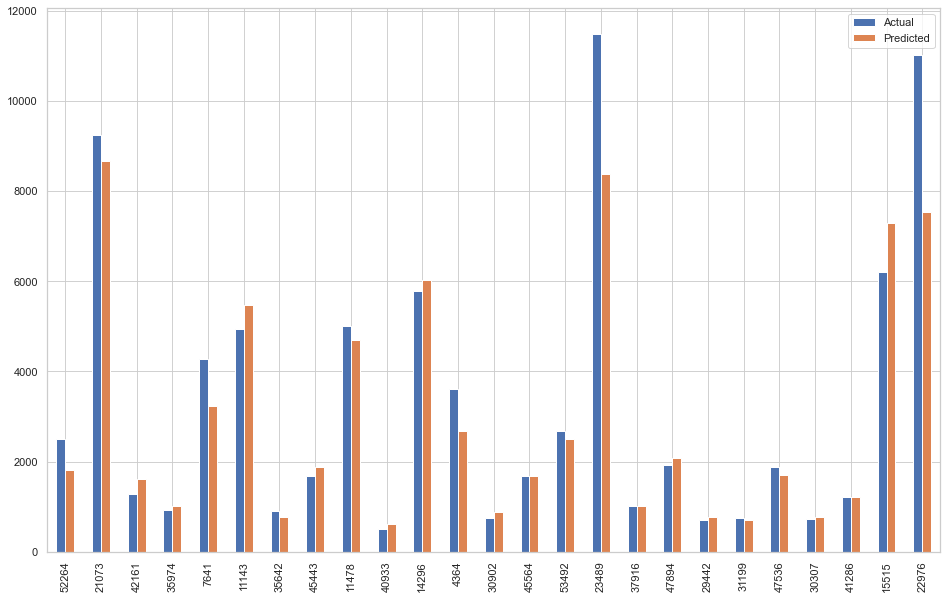

In [67]:
#Showing the difference between the actual and predicted value

df2 = new_df.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.9')
plt.grid(which='minor', linestyle=':', linewidth='0.9')
plt.show()

In [68]:
from sklearn import metrics
scratch_acu=metrics.r2_score(Y_test,y_pred_KNN)
scratch_acu

0.9531941605312977

In [69]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, y_pred_KNN))

print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred_KNN))


print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_KNN)))

Mean Absolute Error:  416.9967865529601
Mean Squared Error:  735830.5349070984
Root Mean Squared Error:  857.8056510114038


### KNeighborsRegressor using sklearn

In [70]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_new, Y_train)

KNeighborsRegressor()

In [71]:
y_test_pred = regressor.predict(X_test_new)

In [72]:
new_df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_test_pred})

new_df1.head()

,Actual,Predicted
52264,2491,1779.6
21073,9248,9000.6
42161,1284,1367.8
35974,921,960.4
7641,4268,2794.6


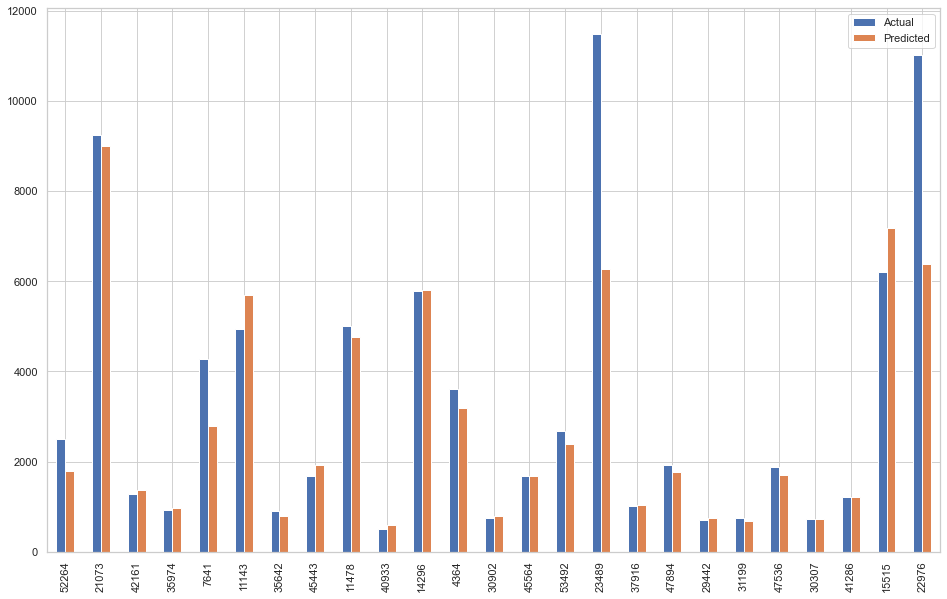

In [73]:
#Showing the difference between the actual and predicted value

df2 = new_df1.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.9')
plt.grid(which='minor', linestyle=':', linewidth='0.9')
plt.show()

In [74]:
sk_acu=metrics.r2_score(Y_test,y_test_pred)
sk_acu

0.9544419010237735

In [75]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)))

Mean Absolute Error:  408.99296996662963
Mean Squared Error:  716214.9150522803
Root Mean Squared Error:  846.2948156832111


Comparing R2 scores

In [76]:
print("Accuracy calculated using Numpy Broadcasting:",scratch_acu)
print("Accuracy calculated using Scikitlearn:",sk_acu)

Accuracy calculated using Numpy Broadcasting: 0.9531941605312977
Accuracy calculated using Scikitlearn: 0.9544419010237735
